Convlutions are a critical component of evey good statistical analysis. Its a way to multiply distributions together. 
Lets build convlutions up by scratch and then go from there. 

The core concept of a convolution is that you are effectively multiplying distributions. Given two functions $f(x)$ and $g(x)$, we can define convolutions by 
\begin{eqnarray}
(f*g)(z) &=& \int^{\infty}_{-\infty} f(z-t)g(t)dt
\end{eqnarray}
For data analysis, we usually think about this in the context of probability distribuitons $g$ and $f$. From here, we construct a new probability distribution $(f*g)$. Anyway, lets take a look at how it works. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

In [16]:
#First lets define a triangular distribution
def triangle(x,mean=5):
    Norm=mean*mean
    if x <= mean: 
        return max(x,0)/Norm
    if x > mean:
        return max(2*mean-x,0)/Norm
#Now define the gaussian
def gaussian(x,mean=0,sigma=1):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sigma**2)) 


In [14]:
#Now lets do a convolution by hand
def convolve(f1,f2,x,iMin=-10,iMax=10,iN=2000):
    step=(iMax-iMin)/iN
    pInt=0
    for i0 in range(iN):
            pX   = i0*step+iMin
            pVal = f1(x-pX)*f2(pX)
            pInt += pVal*step
    return pInt

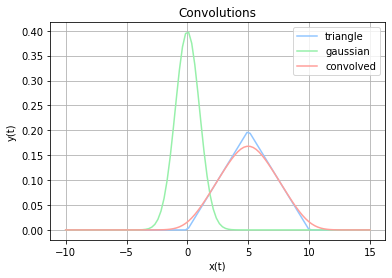

In [17]:
fig, ax = plt.subplots()
x_in=np.linspace(-10, 15, 100)
tri_out=np.array(list(map(triangle, x_in)))#triangle(x_in)
gaus_out=np.array(list(map(gaussian, x_in))) #gaussian(x_in)
conv_out=[]
for val in x_in:
    pConv_out=convolve(gaussian,triangle,val)
    conv_out.append(pConv_out)
    
ax.plot(x_in,tri_out,label='triangle')
ax.plot(x_in,gaus_out,label='gaussian')
ax.plot(x_in,conv_out,label='convolved')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()